In [18]:
import pandas as pd
import numpy as np
import requests
import time
from opencage.geocoder import OpenCageGeocode
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from geopy.distance import geodesic
from scipy.spatial import distance_matrix

In [15]:
ebonyi_data = pd.read_csv(r'C:\Users\User\Downloads\Data Azure\Ebonyi_crosschecked.csv')
ebonyi_data

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,EBONYI,ABAKALIKI,ABAKPA,11-01-01-002,ADAZI-ENU HALL II,150,750,True,-1,False,True,False,False,UNKNOWN,1,139,0,2,https://docs.inecelectionresults.net/elections...
1,EBONYI,ABAKALIKI,ABAKPA,11-01-01-003,CO-OPERATIVE SQUARE I,257,1045,True,-1,False,False,False,False,UNKNOWN,2,163,1,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,EBONYI,ABAKALIKI,ABAKPA,11-01-01-004,CO-OPERATIVE SQUARE II,203,750,True,-1,False,False,False,False,UNKNOWN,1,193,4,2,https://docs.inecelectionresults.net/elections...
3,EBONYI,ABAKALIKI,ABAKPA,11-01-01-006,NIBO/NSUKKA STR JUNCTION II,192,750,True,-1,False,False,True,False,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...
4,EBONYI,ABAKALIKI,ABAKPA,11-01-01-007,VANCO HOTEL SPACE I,254,1200,True,-1,False,False,False,False,UNKNOWN,4,244,2,2,https://docs.inecelectionresults.net/elections...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,EBONYI,IKWO,IGBUDU II,11-07-09-008,AKAHUFU PLAY GROUND,73,98,True,-1,True,False,False,False,UNKNOWN,1,65,1,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2560,EBONYI,IKWO,IGBUDU II,11-07-09-009,"URBAN PRIMARY SCHOOL, OGAGBO",39,59,True,-1,False,False,False,False,UNKNOWN,1,34,1,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2561,EBONYI,EBONYI,ECHIABA,11-04-04-013,AMIKE ABA TOWN HALL,146,318,True,-1,False,False,False,False,UNKNOWN,43,77,6,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2562,EBONYI,EBONYI,ECHIABA,11-04-04-015,UNITY FM JUNCTION,0,0,True,-1,False,False,False,False,UNKNOWN,7,180,4,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


In [ ]:
def geocode_address(address, api_key):
    url = f'https://api.opencagedata.com/geocode/v1/json?q={address}&key={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data['results']:
            return data['results'][0]['geometry']['lat'], data['results'][0]['geometry']['lng']
    return None, None

# Use your actual OpenCage API key
api_key = ''

# Load the CSV file
ebonyi_data = pd.read_csv(r'C:\Users\User\Downloads\Data Azure\Ebonyi_crosschecked.csv')

# Combine relevant columns to form the address
ebonyi_data['address'] = ebonyi_data['PU-Name'] + ', ' + ebonyi_data['Ward'] + ', ' + ebonyi_data['LGA'] + ', ' + 'Ebonyi, Nigeria'

# Geocode each polling unit
latitudes = []
longitudes = []

for address in ebonyi_data['address']:
    lat, lon = geocode_address(address, api_key)
    latitudes.append(lat)
    longitudes.append(lon)
    time.sleep(1)  # to respect API rate limits

ebonyi_data['latitude'] = latitudes
ebonyi_data['longitude'] = longitudes

# Save the updated DataFrame to a new CSV file
ebonyi_data.to_csv(r'C:\Users\User\Downloads\Data Azure\Ebonyi_data.csv', index=False)

print(f"Geocoded data saved to ebonyi_data.csv")


In [6]:
eb = pd.read_csv( r'C:\Users\User\Downloads\Data Azure\Ebonyi_data.csv')

In [7]:
eb

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File,address,latitude,longitude,cluster
0,EBONYI,ABAKALIKI,ABAKPA,11-01-01-002,ADAZI-ENU HALL II,150,750,True,-1,False,...,UNKNOWN,1,139,0,2,https://docs.inecelectionresults.net/elections...,"ADAZI-ENU HALL II, ABAKPA, ABAKALIKI, Ebonyi,...",6.32485,8.11368,0
1,EBONYI,ABAKALIKI,ABAKPA,11-01-01-003,CO-OPERATIVE SQUARE I,257,1045,True,-1,False,...,UNKNOWN,2,163,1,1,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"CO-OPERATIVE SQUARE I, ABAKPA, ABAKALIKI, Ebon...",6.32485,8.11368,0
2,EBONYI,ABAKALIKI,ABAKPA,11-01-01-004,CO-OPERATIVE SQUARE II,203,750,True,-1,False,...,UNKNOWN,1,193,4,2,https://docs.inecelectionresults.net/elections...,"CO-OPERATIVE SQUARE II, ABAKPA, ABAKALIKI, Ebo...",6.32485,8.11368,0
3,EBONYI,ABAKALIKI,ABAKPA,11-01-01-006,NIBO/NSUKKA STR JUNCTION II,192,750,True,-1,False,...,UNKNOWN,0,0,0,0,https://docs.inecelectionresults.net/elections...,"NIBO/NSUKKA STR JUNCTION II, ABAKPA, ABAKALIKI...",6.32485,8.11368,0
4,EBONYI,ABAKALIKI,ABAKPA,11-01-01-007,VANCO HOTEL SPACE I,254,1200,True,-1,False,...,UNKNOWN,4,244,2,2,https://docs.inecelectionresults.net/elections...,"VANCO HOTEL SPACE I, ABAKPA, ABAKALIKI, Ebonyi...",6.32485,8.11368,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,EBONYI,ISHIELU,EZILLO II,11-08-06-013,UMUAKPU P/GROUND II,119,361,True,-1,False,...,UNKNOWN,2,108,4,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"UMUAKPU P/GROUND II, EZILLO II, ISHIELU, Ebony...",6.42714,7.83583,11
2449,EBONYI,ISHIELU,EZILLO II,11-08-06-014,UMUEZOKE PLAY GROUND II,74,214,True,-1,False,...,UNKNOWN,4,60,3,0,https://docs.inecelectionresults.net/elections...,"UMUEZOKE PLAY GROUND II, EZILLO II, ISHIELU, E...",6.42714,7.83583,11
2450,EBONYI,ISHIELU,AGBA,11-08-01-015,NGAMGBO ENYALI-IGWE TOWN HALL,17,26,True,-1,False,...,UNKNOWN,7,9,0,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"NGAMGBO ENYALI-IGWE TOWN HALL, AGBA, ISHIELU, ...",6.42714,7.83583,11
2451,EBONYI,ISHIELU,"AZUINYABA ""A""",11-08-03-006,OHABUEZU PRI. SCHOOL,91,344,True,-1,False,...,UNKNOWN,13,63,6,2,https://inec-cvr-cache.s3.eu-west-1.amazonaws....,"OHABUEZU PRI. SCHOOL, AZUINYABA ""A"", ISHIELU, ...",6.42714,7.83583,11


In [8]:
# Drop columns 'B' and 'D'
eb.drop(columns=['Results_File', 'cluster'])

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,...,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,address,latitude,longitude
0,EBONYI,ABAKALIKI,ABAKPA,11-01-01-002,ADAZI-ENU HALL II,150,750,True,-1,False,...,False,False,UNKNOWN,1,139,0,2,"ADAZI-ENU HALL II, ABAKPA, ABAKALIKI, Ebonyi,...",6.32485,8.11368
1,EBONYI,ABAKALIKI,ABAKPA,11-01-01-003,CO-OPERATIVE SQUARE I,257,1045,True,-1,False,...,False,False,UNKNOWN,2,163,1,1,"CO-OPERATIVE SQUARE I, ABAKPA, ABAKALIKI, Ebon...",6.32485,8.11368
2,EBONYI,ABAKALIKI,ABAKPA,11-01-01-004,CO-OPERATIVE SQUARE II,203,750,True,-1,False,...,False,False,UNKNOWN,1,193,4,2,"CO-OPERATIVE SQUARE II, ABAKPA, ABAKALIKI, Ebo...",6.32485,8.11368
3,EBONYI,ABAKALIKI,ABAKPA,11-01-01-006,NIBO/NSUKKA STR JUNCTION II,192,750,True,-1,False,...,True,False,UNKNOWN,0,0,0,0,"NIBO/NSUKKA STR JUNCTION II, ABAKPA, ABAKALIKI...",6.32485,8.11368
4,EBONYI,ABAKALIKI,ABAKPA,11-01-01-007,VANCO HOTEL SPACE I,254,1200,True,-1,False,...,False,False,UNKNOWN,4,244,2,2,"VANCO HOTEL SPACE I, ABAKPA, ABAKALIKI, Ebonyi...",6.32485,8.11368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,EBONYI,ISHIELU,EZILLO II,11-08-06-013,UMUAKPU P/GROUND II,119,361,True,-1,False,...,False,False,UNKNOWN,2,108,4,0,"UMUAKPU P/GROUND II, EZILLO II, ISHIELU, Ebony...",6.42714,7.83583
2449,EBONYI,ISHIELU,EZILLO II,11-08-06-014,UMUEZOKE PLAY GROUND II,74,214,True,-1,False,...,False,False,UNKNOWN,4,60,3,0,"UMUEZOKE PLAY GROUND II, EZILLO II, ISHIELU, E...",6.42714,7.83583
2450,EBONYI,ISHIELU,AGBA,11-08-01-015,NGAMGBO ENYALI-IGWE TOWN HALL,17,26,True,-1,False,...,False,False,UNKNOWN,7,9,0,0,"NGAMGBO ENYALI-IGWE TOWN HALL, AGBA, ISHIELU, ...",6.42714,7.83583
2451,EBONYI,ISHIELU,"AZUINYABA ""A""",11-08-03-006,OHABUEZU PRI. SCHOOL,91,344,True,-1,False,...,False,False,UNKNOWN,13,63,6,2,"OHABUEZU PRI. SCHOOL, AZUINYABA ""A"", ISHIELU, ...",6.42714,7.83583


In [9]:
eb.shape

(2453, 23)

In [15]:
# subset the dataset
data = eb.loc[:, ['State','LGA','Ward','PU-Code','PU-Name','APC','LP','PDP','NNPP','latitude','longitude']].copy()
data
data.to_excel( r'C:\Users\User\Downloads\Data Azure\Ebonyi_data.xlsx',index=False)

In [11]:
#check for the percentage of null values in each columns
(data.isnull().sum()/len(data)*100)
# The percentage of null values in both lat ang lon is 100 we need to drop those columns

State        0.0
LGA          0.0
Ward         0.0
PU-Code      0.0
PU-Name      0.0
APC          0.0
LP           0.0
PDP          0.0
NNPP         0.0
latitude     0.0
longitude    0.0
dtype: float64

In [12]:
data.dropna(subset=['latitude','longitude'],inplace = True)

In [13]:
df = pd.DataFrame(data)
def find_neighbours(polling_unit, radius=1):
    neighbours = []
    for index, row in df.iterrows():
        if polling_unit.name != index:  # Exclude the polling unit itself
            distance = geodesic((polling_unit['latitude'], polling_unit['longitude']), (row['latitude'], row['longitude'])).km
            if distance <= radius:
                neighbours.append(index)
    return neighbours

# Add a column for neighbours
df['neighbours'] = df.apply(lambda row: find_neighbours(row), axis=1)

#save the data to a csv file
df.to_csv('Ebonyi_Election_Data_With_Outlier_Scores.csv', index=False)


In [20]:
# Reset index to ensure sequential indexing
data.reset_index(drop=True, inplace=True)

# Extract latitude and longitude columns
lat_lon = data[['latitude', 'longitude']].values

# Calculate the distance matrix between all polling units
dist_matrix = distance_matrix(lat_lon, lat_lon)
dist_matrix

array([[0.        , 0.        , 0.        , ..., 0.29608084, 0.29608084,
        0.29608084],
       [0.        , 0.        , 0.        , ..., 0.29608084, 0.29608084,
        0.29608084],
       [0.        , 0.        , 0.        , ..., 0.29608084, 0.29608084,
        0.29608084],
       ...,
       [0.29608084, 0.29608084, 0.29608084, ..., 0.        , 0.        ,
        0.        ],
       [0.29608084, 0.29608084, 0.29608084, ..., 0.        , 0.        ,
        0.        ],
       [0.29608084, 0.29608084, 0.29608084, ..., 0.        , 0.        ,
        0.        ]])

In [21]:
#Define the radius for neighbours (in kilometers)
radius_km = 1.0

# Create a list to store the outlier scores and neighbour information
results = []

# Iterate over each polling unit to calculate the outlier scores
for index, row in data.iterrows():
    # Find neighbouring polling units within the specified radius
    neighbours = data[(dist_matrix[index] <= radius_km) & (data.index != index)]

    # Calculate the outlier score for each party
    apc_outlier = abs(row['APC'] - neighbours['APC'].mean()) if not neighbours.empty else 0
    lp_outlier = abs(row['LP'] - neighbours['LP'].mean()) if not neighbours.empty else 0
    pdp_outlier = abs(row['PDP'] - neighbours['PDP'].mean()) if not neighbours.empty else 0
    nnpp_outlier = abs(row['NNPP'] - neighbours['NNPP'].mean()) if not neighbours.empty else 0

    # Store the results
    results.append({
        'PU-Name': row['PU-Name'],
        'Latitude': row['latitude'],
        'Longitude': row['longitude'],
        'APC_outlier': apc_outlier,
        'LP_outlier': lp_outlier,
        'PDP_outlier': pdp_outlier,
        'NNPP_outlier': nnpp_outlier,
        'Neighbour_polls': neighbours['PU-Name'].tolist()
    })

# Convert the results list to a DataFrame
outlier_scores = pd.DataFrame(results)

# Display the outlier scores
outlier_scores.head()

,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier,Neighbour_polls
0,ADAZI-ENU HALL II,6.32485,8.11368,14.409054,51.908238,5.117047,1.408646,"[CO-OPERATIVE SQUARE I, CO-OPERATIVE SQUARE II..."
1,CO-OPERATIVE SQUARE I,6.32485,8.11368,13.408646,75.918026,4.116639,0.408238,"[ADAZI-ENU HALL II, CO-OPERATIVE SQUARE II, N..."
2,CO-OPERATIVE SQUARE II,6.32485,8.11368,14.409054,105.930261,1.115416,1.408646,"[ADAZI-ENU HALL II, CO-OPERATIVE SQUARE I, NI..."
3,NIBO/NSUKKA STR JUNCTION II,6.32485,8.11368,15.409462,87.148450,5.117047,0.592170,"[ADAZI-ENU HALL II, CO-OPERATIVE SQUARE I, CO..."
4,VANCO HOTEL SPACE I,6.32485,8.11368,11.407830,156.951060,3.116232,1.408646,"[ADAZI-ENU HALL II, CO-OPERATIVE SQUARE I, CO..."


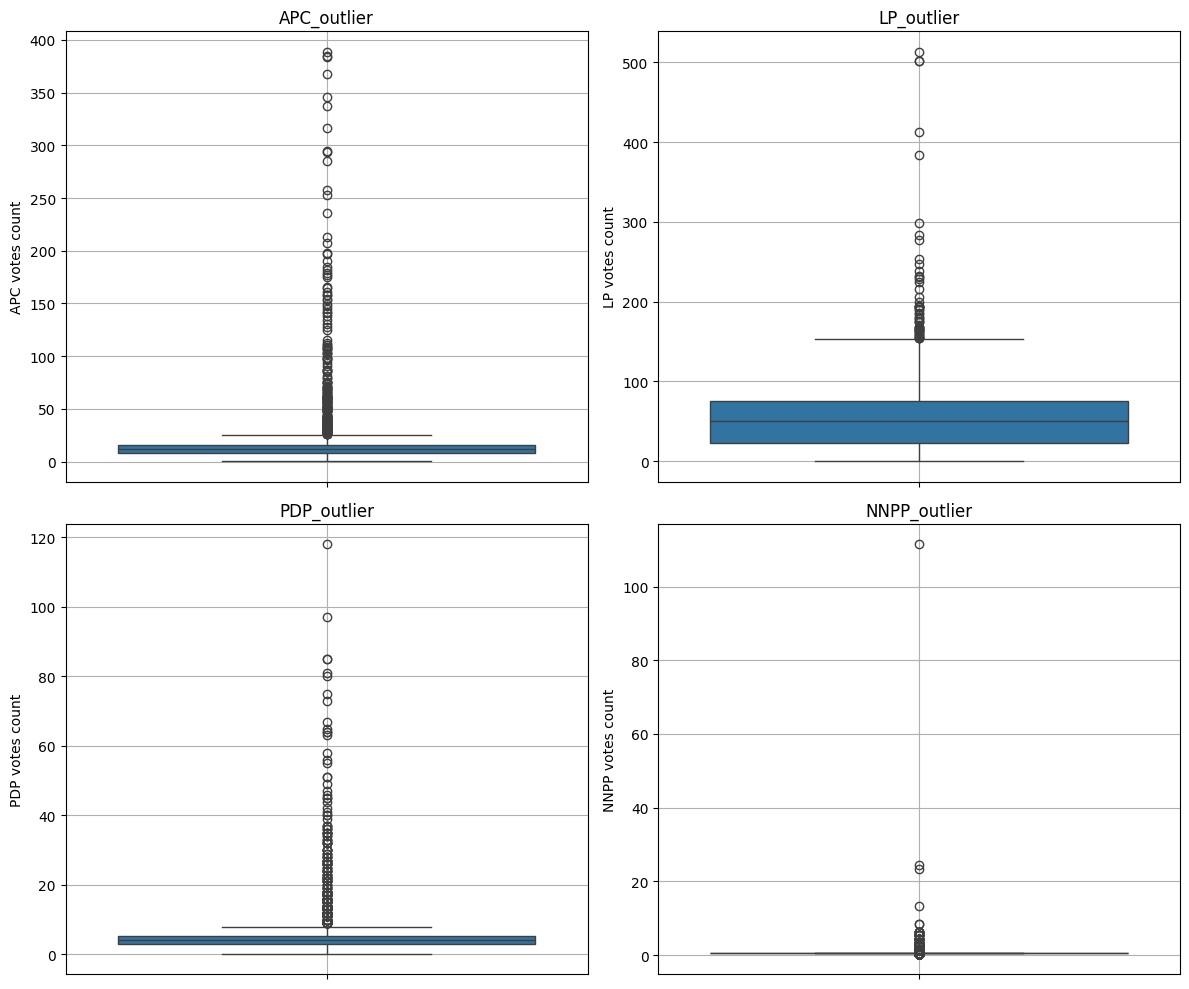

In [22]:
# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot each scatter plot
sns.boxplot(ax=axs[0, 0], data=outlier_scores['APC_outlier'])
axs[0, 0].set_title('APC_outlier')
axs[0,0].set_ylabel('APC votes count')
axs[0, 0].grid(True)

sns.boxplot(ax=axs[0, 1], data=outlier_scores['LP_outlier'])
axs[0, 1].set_title('LP_outlier')
axs[0,1].set_ylabel('LP votes count')
axs[0, 1].grid(True)

sns.boxplot(ax=axs[1, 0], data=outlier_scores['PDP_outlier'])
axs[1, 0].set_title('PDP_outlier')
axs[1,0].set_ylabel('PDP votes count')
axs[1, 0].grid(True)


sns.boxplot(ax=axs[1, 1], data=outlier_scores['NNPP_outlier'])
axs[1, 1].set_title('NNPP_outlier')
axs[1,1].set_ylabel('NNPP votes count')
axs[1, 1].grid(True)
# Adjust the layout
plt.tight_layout()

plt.savefig('election_outliers.png')

# Display the plots
plt.show()

In [23]:
from IPython.display import display, HTML

outlier_scores = pd.DataFrame(results)
out = outlier_scores.drop(columns=['Neighbour_polls'])
# Sort the dataset by the outlier scores for each party
sorted_apc = out.sort_values(by='APC_outlier', ascending=False).head(3)
sorted_lp = out.sort_values(by='LP_outlier', ascending=False).head(3)
sorted_pdp = out.sort_values(by='PDP_outlier', ascending=False).head(3)
sorted_nnpp = out.sort_values(by='NNPP_outlier', ascending=False).head(3)

# Display the DataFrames
print('\033[1m' + 'Top 3 APC Outliers:' + '\033[0m')
display(HTML(sorted_apc.to_html()))
display(HTML('<hr style="height:3px;border:none;color:#333;background-color:#333;" />'))  # Horizontal line separator

print('\033[1m' + 'Top 3 PDP Outliers:' + '\033[0m')
display(HTML(sorted_pdp.to_html()))
display(HTML('<hr style="height:3px;border:none;color:#333;background-color:#333;" />'))  # Horizontal line separator

print('\033[1m' + 'Top 3 LP Outliers:' + '\033[0m')
display(HTML(sorted_lp.to_html()))
display(HTML('<hr style="height:3px;border:none;color:#333;background-color:#333;" />'))  # Horizontal line separator

print('\033[1m' + 'Top 3 NNPC Outliers:' + '\033[0m')
display(HTML(sorted_pdp.to_html()))

Top 3 APC Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
1030,EDUKWU OFEREKPE,6.58597,8.05301,388.755302,86.148042,5.117047,0.59217
1995,EDUKWU EDO PRIMARY SCHOOL,6.07451,8.10060,384.753670,35.901713,5.117047,0.59217
1035,NDIOCHIMBA VILLAGE HALL,6.58597,8.05301,383.753263,64.139070,23.894780,0.59217


Top 3 PDP Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
243,AMAIGBO TOWN HALL,5.84930,7.79870,3.404568,83.146819,117.933116,0.408238
1878,NGAMGBO OGELE,6.11661,8.00100,14.409054,11.117455,96.924551,1.408646
1042,EDUKWIACHI TOWN HALL,6.58597,8.05301,53.618679,19.895188,84.919657,0.592170


Top 3 LP Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
366,STADIUM COVER,6.52184,8.12984,10.407423,513.096248,3.116232,1.408646
120,EBSU PRESCO CAMPUS,6.32485,8.11368,14.409054,502.091762,4.116639,0.592170
1583,OKPOSI STREET NURSERY II,6.32485,8.11368,13.408646,502.091762,4.116639,0.592170


Top 3 NNPC Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
243,AMAIGBO TOWN HALL,5.84930,7.79870,3.404568,83.146819,117.933116,0.408238
1878,NGAMGBO OGELE,6.11661,8.00100,14.409054,11.117455,96.924551,1.408646
1042,EDUKWIACHI TOWN HALL,6.58597,8.05301,53.618679,19.895188,84.919657,0.592170


In [27]:
sorted_apc = out.sort_values(by='APC_outlier', ascending=False)
sorted_lp = out.sort_values(by='LP_outlier', ascending=False)
sorted_pdp = out.sort_values(by='PDP_outlier', ascending=False)
sorted_nnpp = out.sort_values(by='NNPP_outlier', ascending=False)

In [28]:
sorted_apc.to_excel('sorted_apc.xlsx')
sorted_lp.to_excel('sorted_lp.xlsx')
sorted_pdp.to_excel('sorted_pdp.xlsx')
sorted_nnpp.to_excel('sorted_nnpp.xlsx')